# Hierarchical_Clustering

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
df = pd.read_excel('Universities.xlsx')
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [10]:
df.drop(columns=['Univ'], inplace=True)

In [11]:
df

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


In [14]:
df.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [23]:
df.dtypes

SAT         float64
Top10       float64
Accept      float64
SFRatio     float64
Expenses    float64
GradRate    float64
dtype: object

In [25]:
df.duplicated().sum()

0

In [26]:
df.isna().sum()

SAT         0
Top10       0
Accept      0
SFRatio     0
Expenses    0
GradRate    0
dtype: int64

<Axes: >

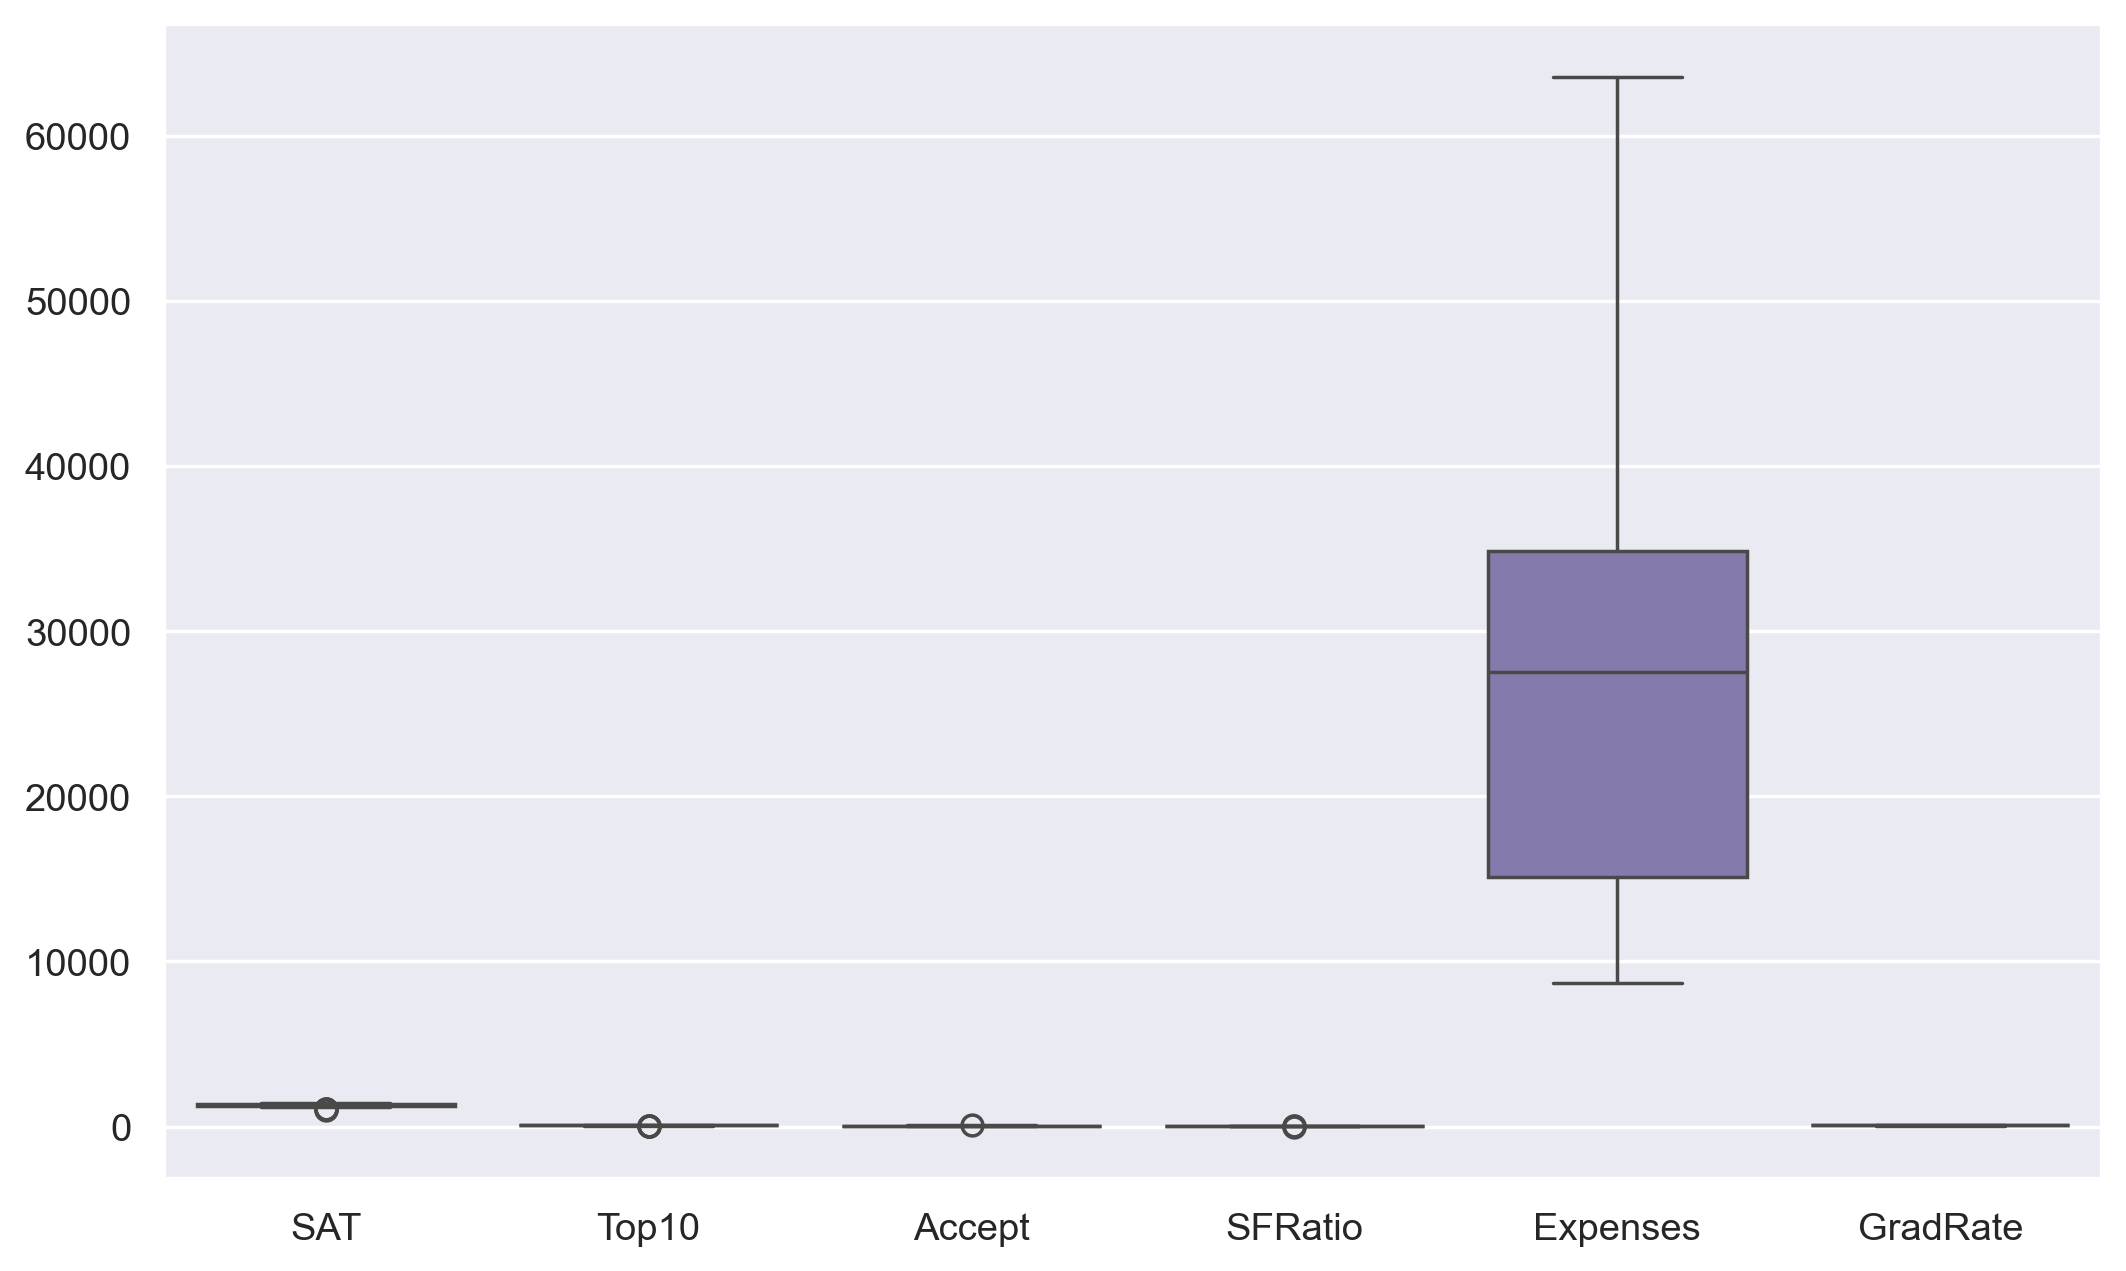

In [16]:
sns.boxplot(df)

In [17]:
def capping(data, columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        IQR = q3 - q1
        lower = q1 - (1.5 * IQR)
        upper = q3 + (1.5 * IQR)
        data[col] = np.where(data[col]> upper, upper, np.where(data[col] < lower, lower, data[col]))

In [19]:
capping(df, df.columns)

In [20]:
df

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310.0,89.0,22.0,13.0,22704.0,94.0
1,1415.0,100.0,25.0,6.5,63575.0,81.0
2,1260.0,62.0,59.0,9.0,25026.0,72.0
3,1310.0,76.0,24.0,12.0,31510.0,88.0
4,1280.0,83.0,33.0,13.0,21864.0,90.0
5,1340.0,89.0,23.0,10.0,32162.0,95.0
6,1315.0,90.0,30.0,12.0,31585.0,95.0
7,1255.0,74.0,24.0,12.0,20126.0,92.0
8,1400.0,91.0,14.0,11.0,39525.0,97.0
9,1305.0,75.0,44.0,7.0,58691.0,87.0


<Axes: >

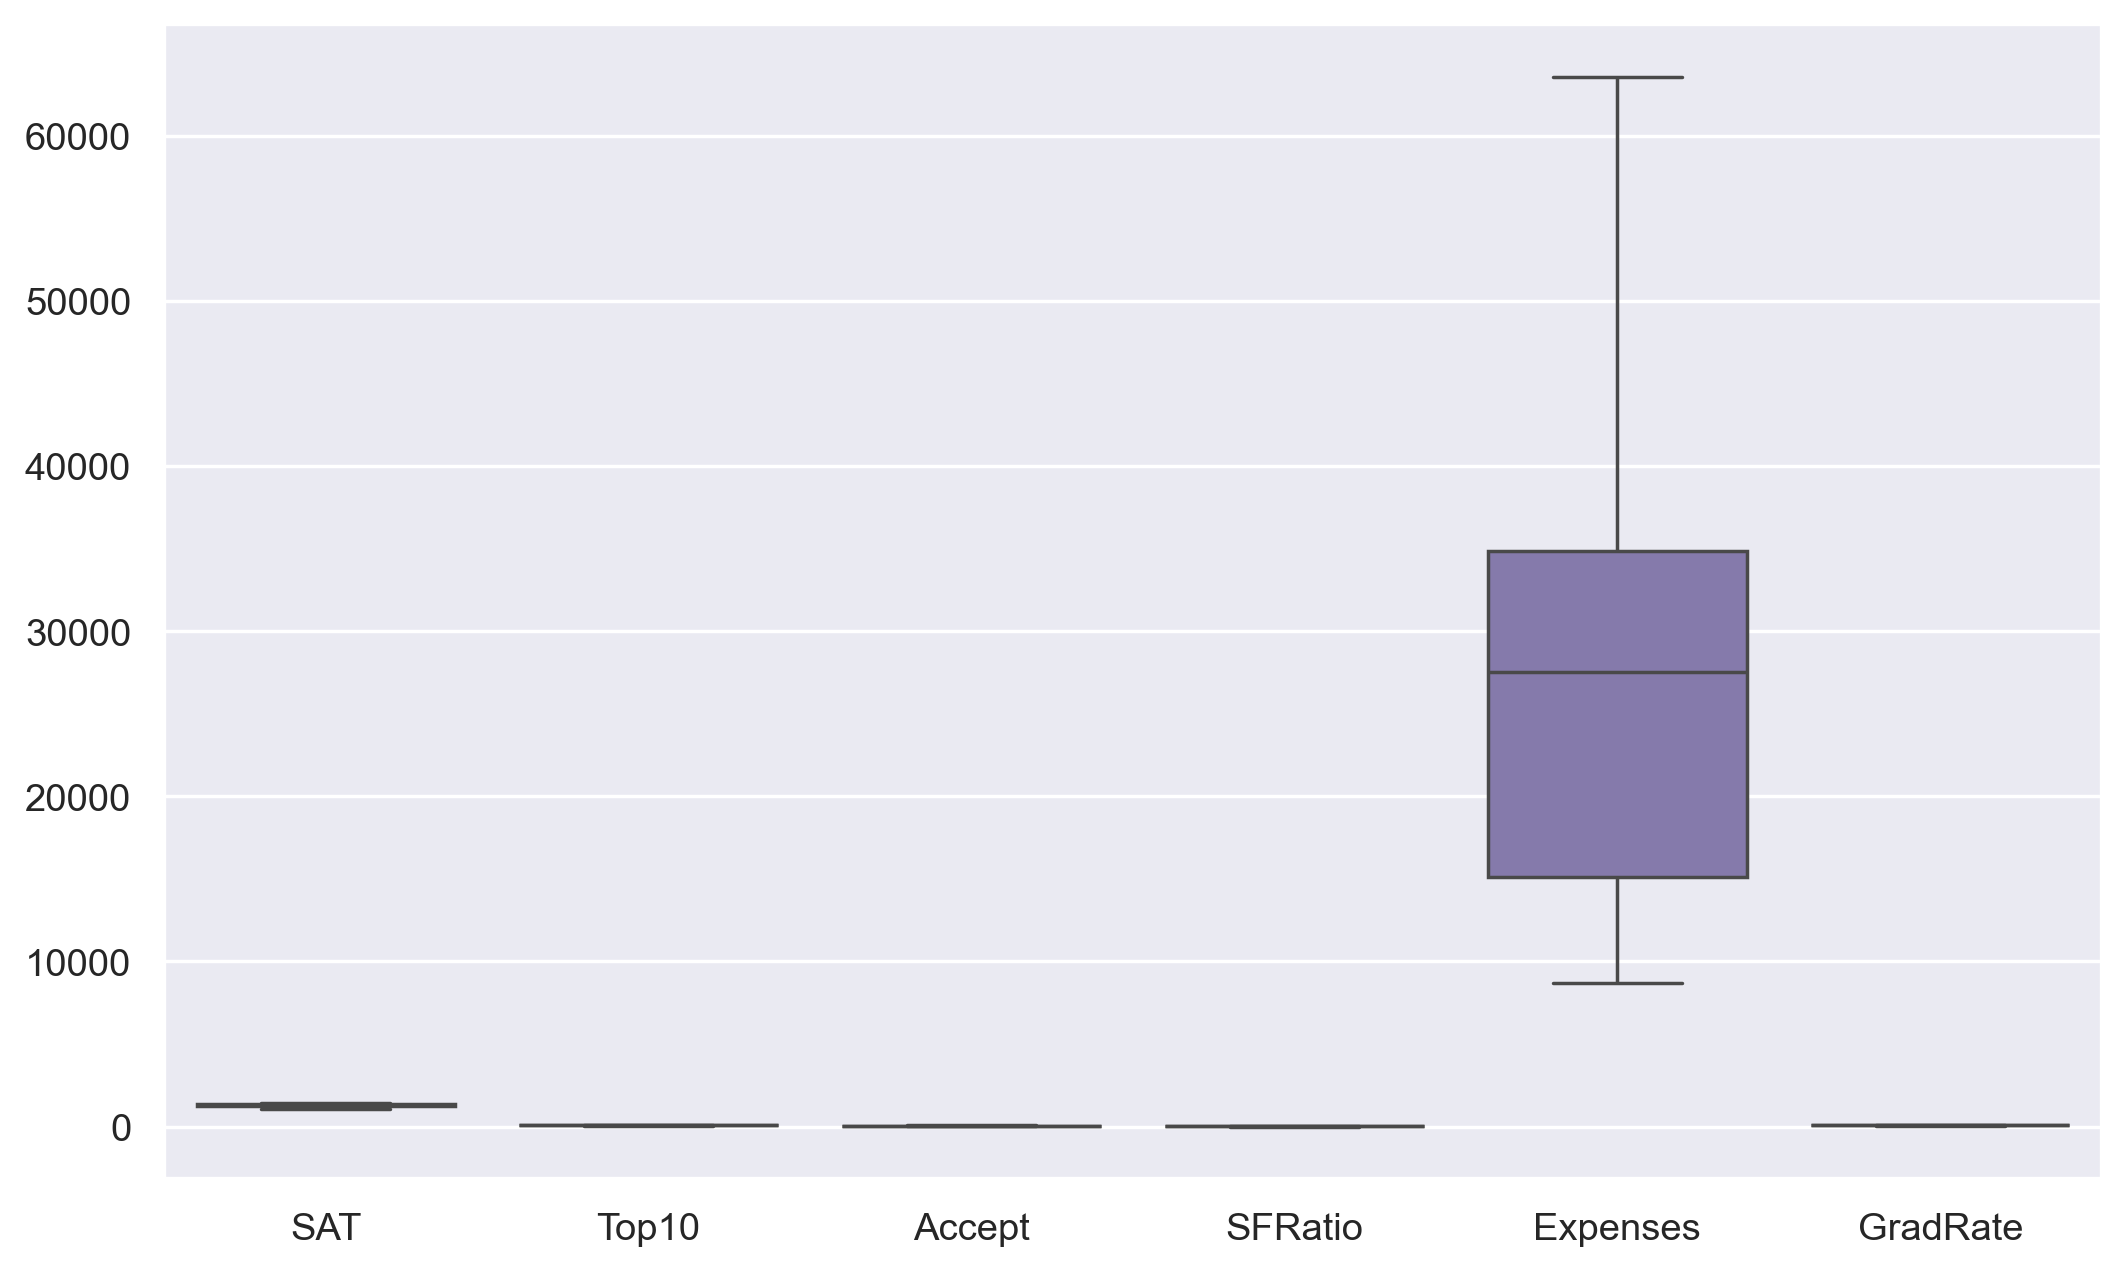

In [21]:
sns.boxplot(df)

<Axes: xlabel='Top10', ylabel='Expenses'>

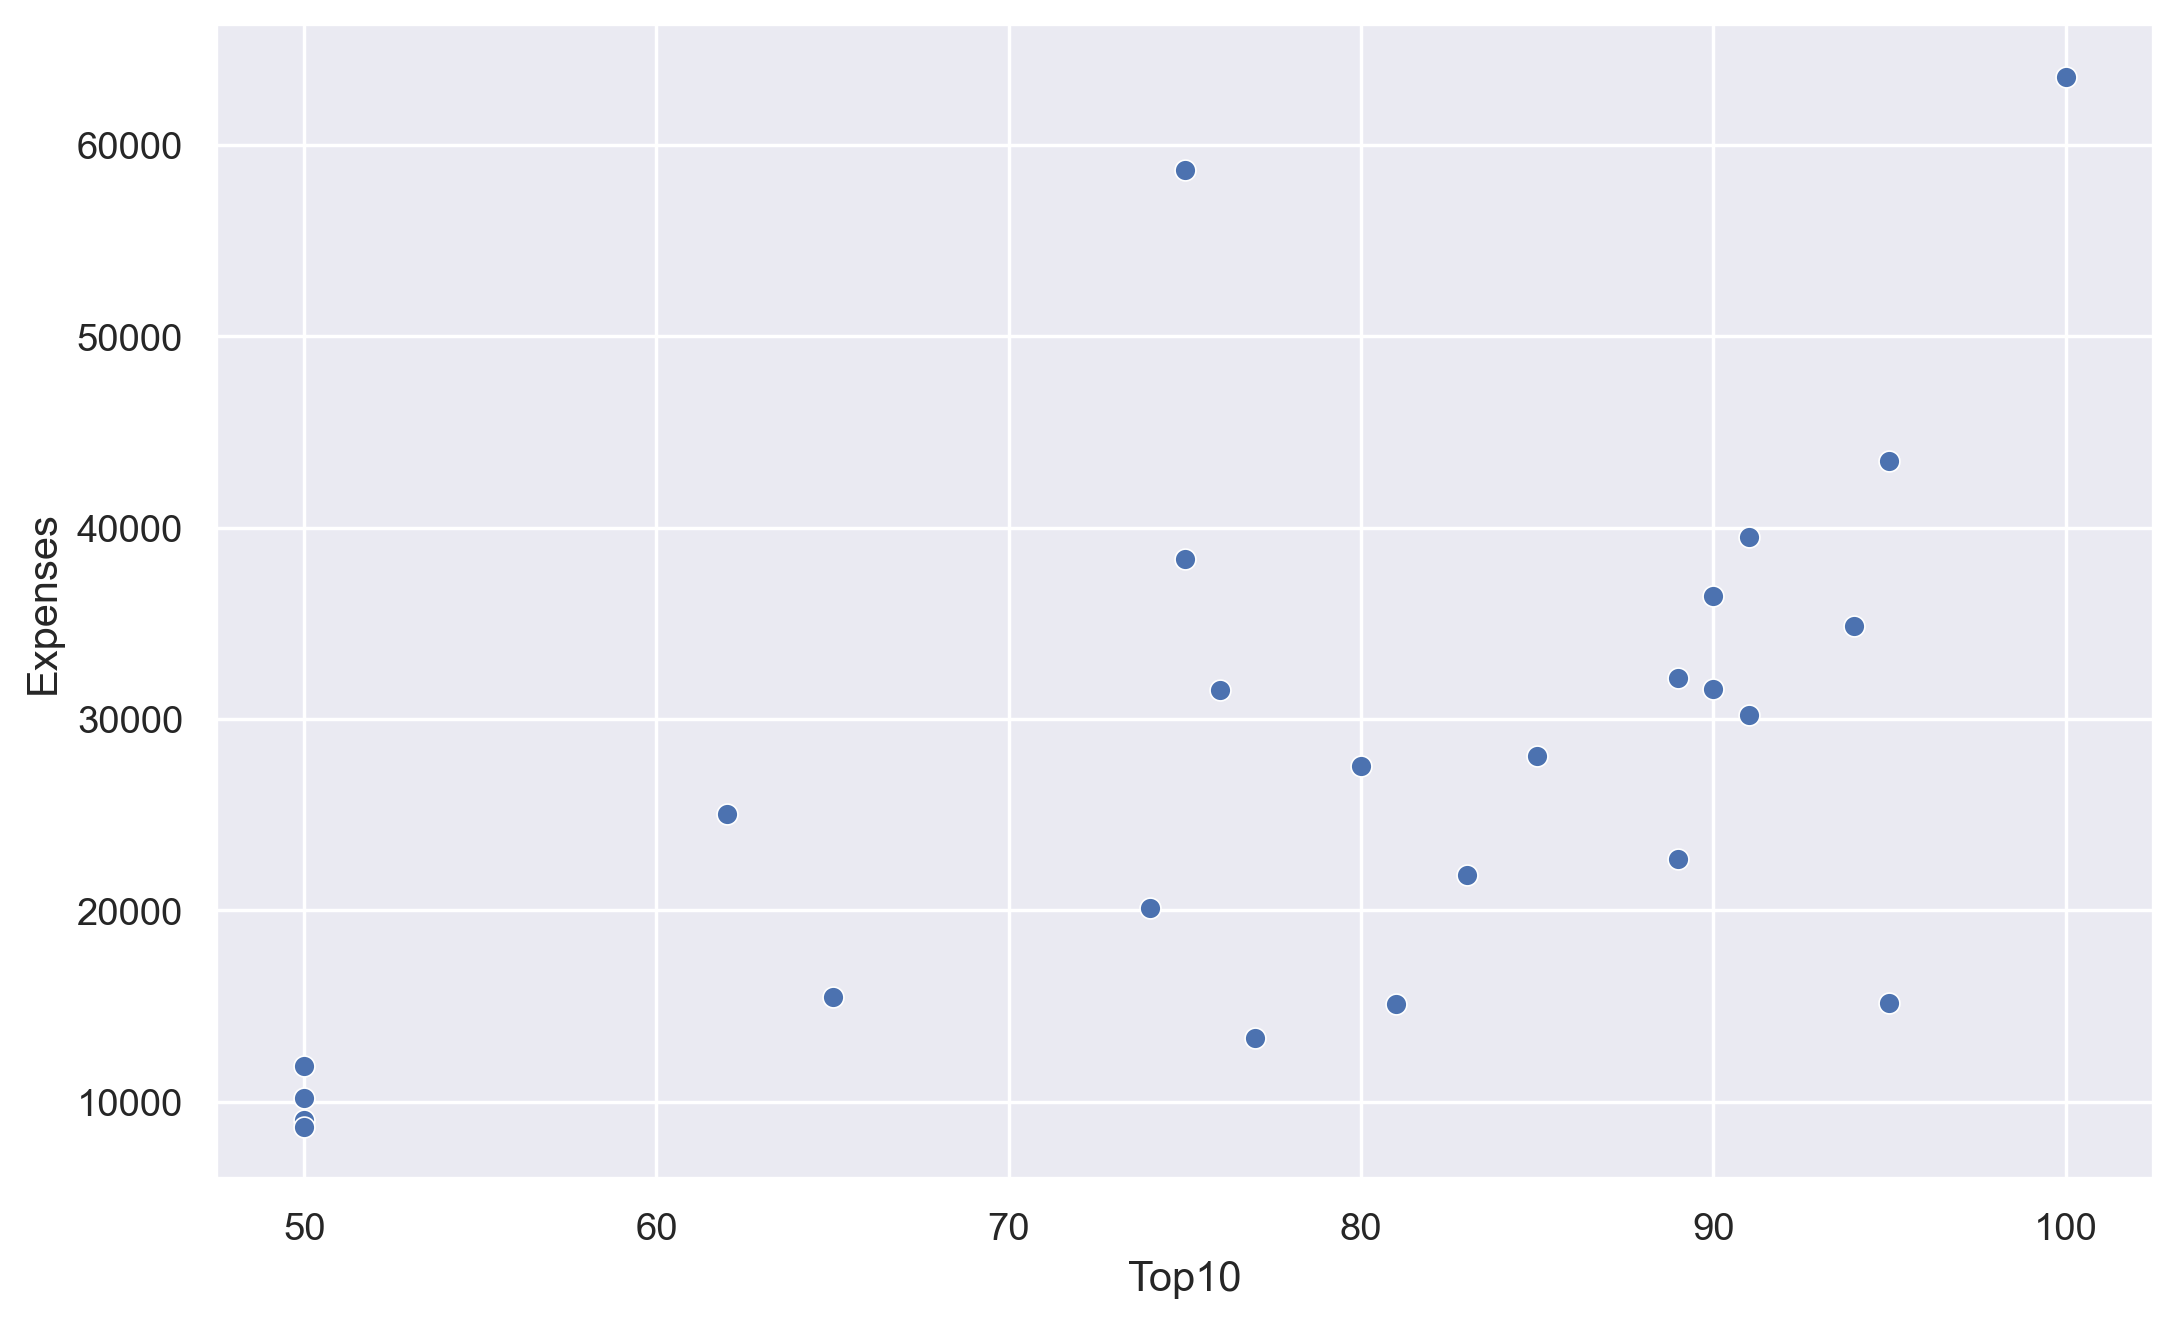

In [37]:
sns.scatterplot(x=df['Top10'], y=df['Expenses'])

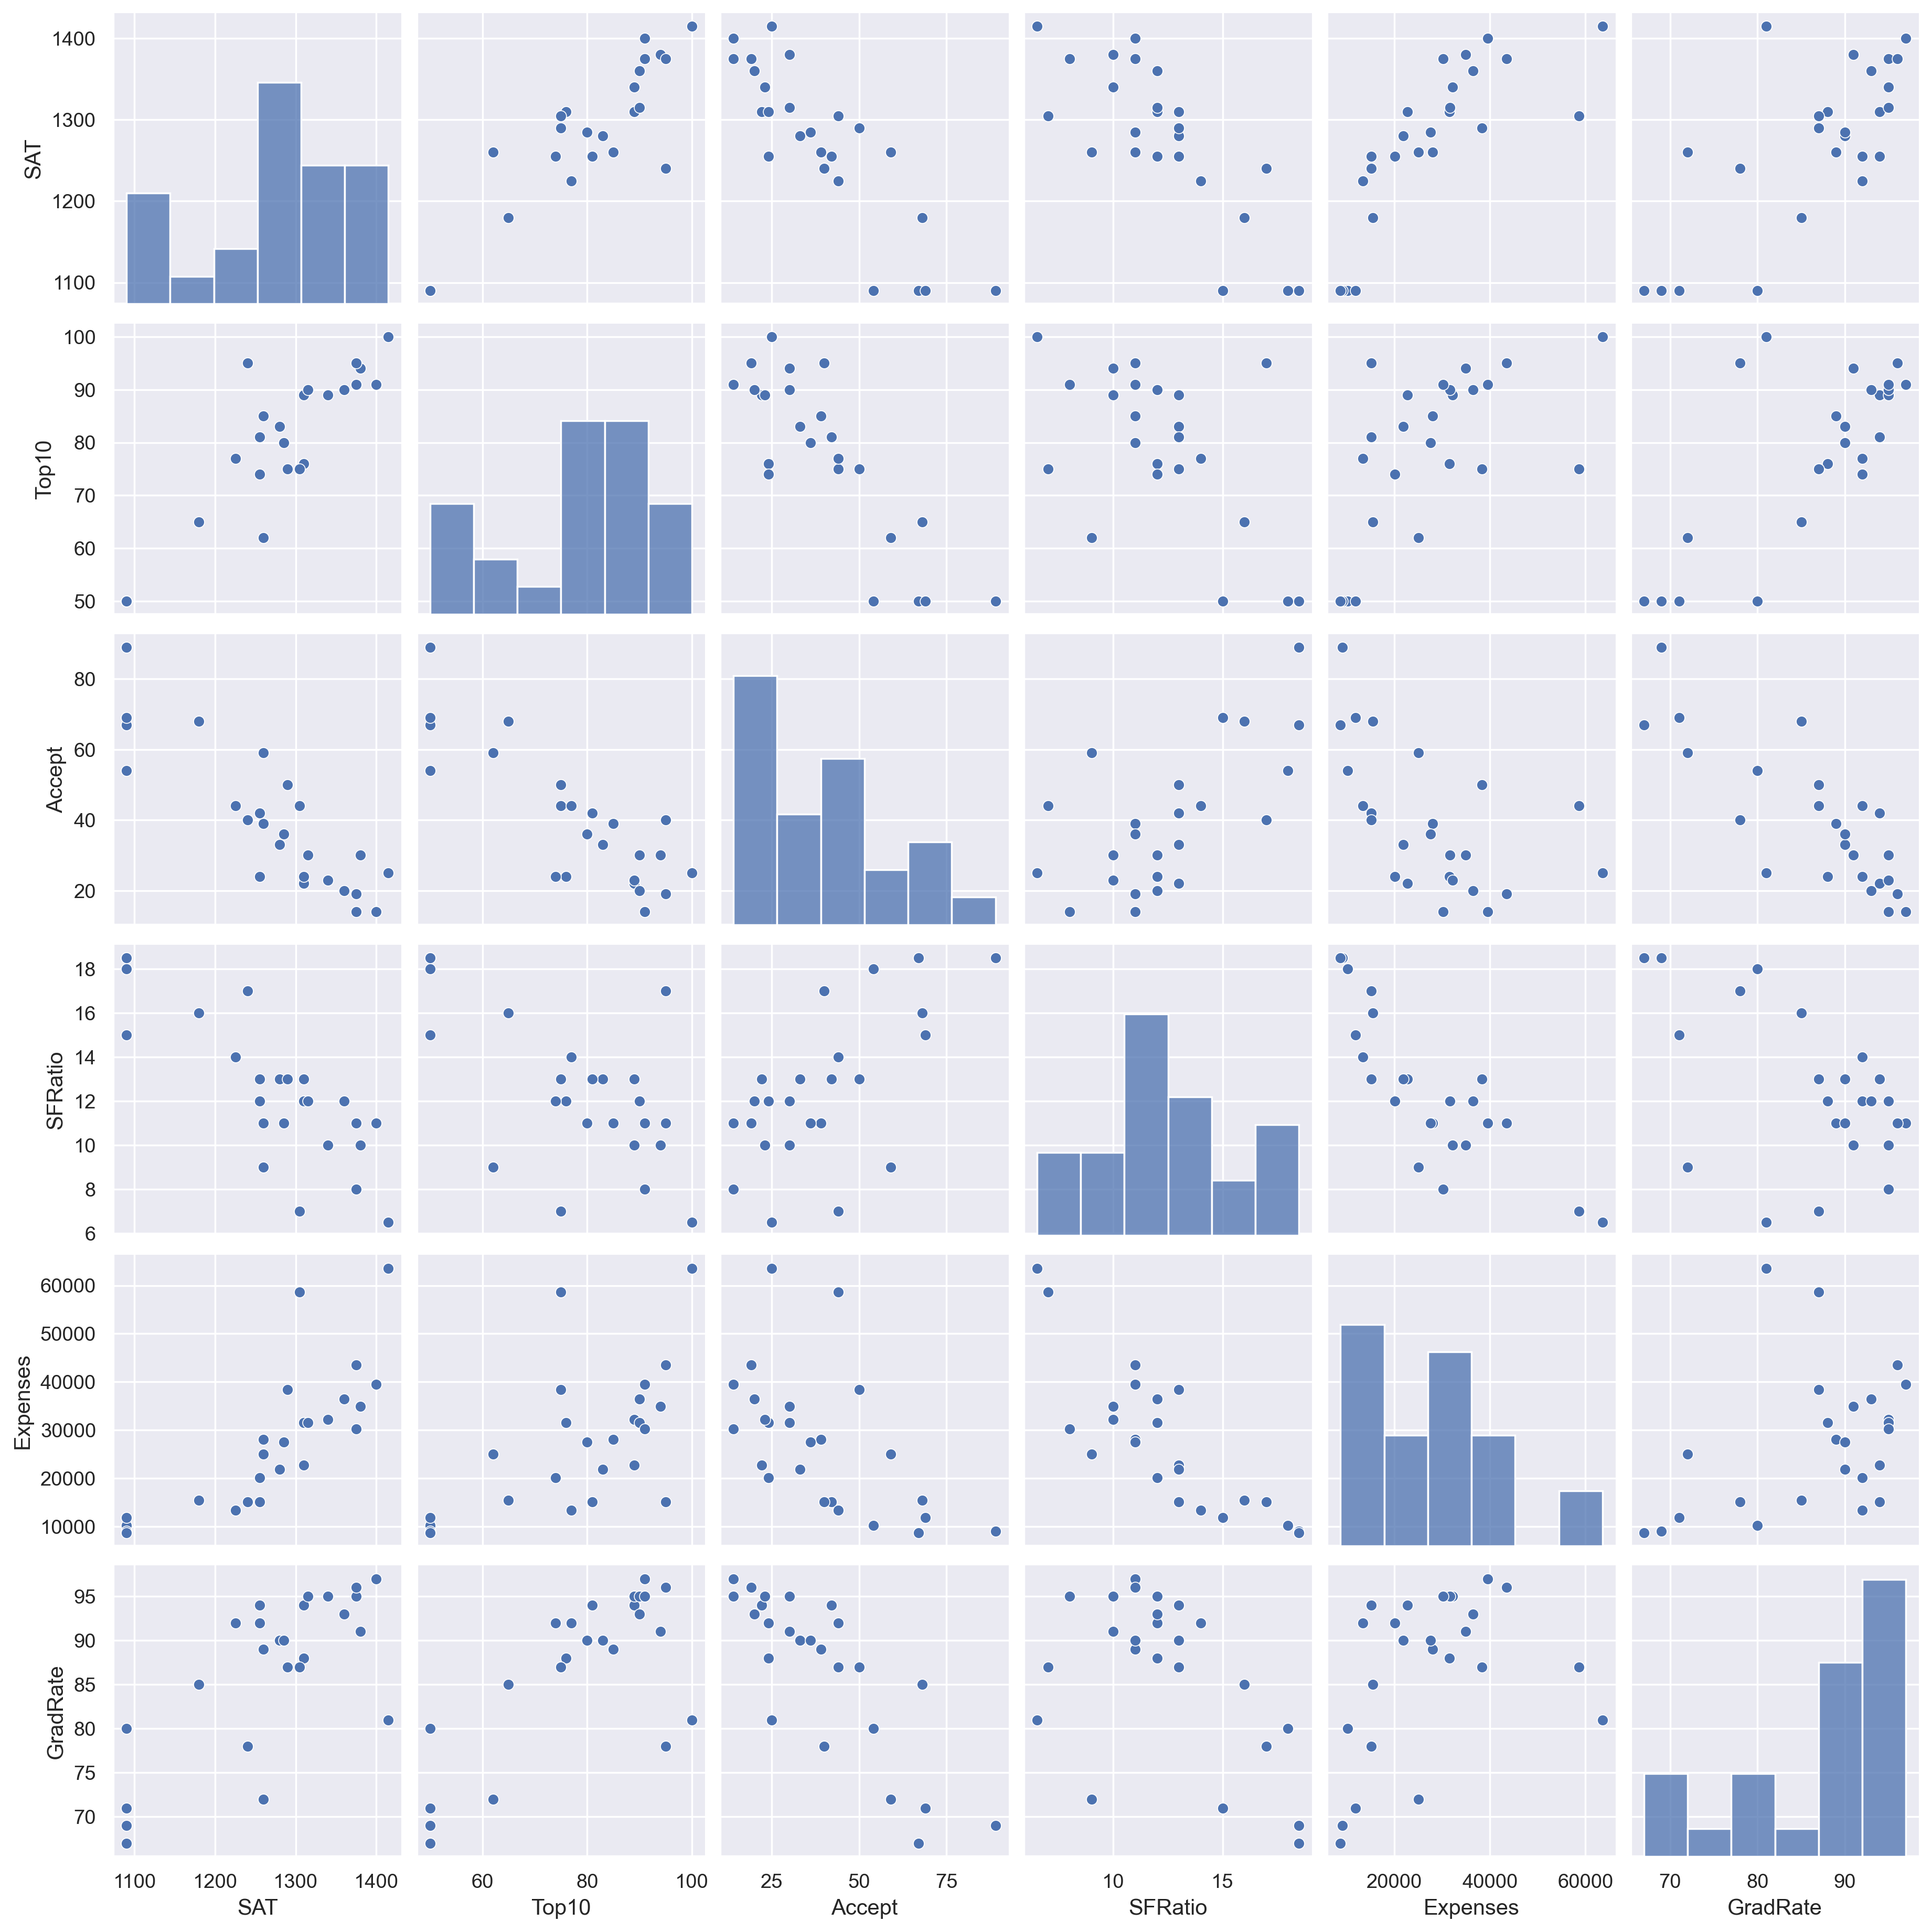

In [38]:
sns.pairplot(df)

# Data Transformation

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[ 0.40354425,  0.69953149, -0.89261944,  0.16571592, -0.33141256,
         0.82030265],
       [ 1.49000956,  1.41733433, -0.73656709, -1.82901269,  2.56038138,
        -0.64452351],
       [-0.11382017, -1.0623482 ,  1.03202621, -1.06180938, -0.16712136,
        -1.65863393],
       [ 0.40354425, -0.14878095, -0.78858454, -0.14116541,  0.29164871,
         0.14422904],
       [ 0.0931256 ,  0.30800267, -0.32042749,  0.16571592, -0.39084607,
         0.36958691],
       [ 0.71396291,  0.69953149, -0.84060199, -0.75492806,  0.33778044,
         0.93298158],
       [ 0.4552807 ,  0.76478629, -0.47647984, -0.14116541,  0.29695528,
         0.93298158],
       [-0.16555662, -0.27929056, -0.78858454, -0.14116541, -0.51381683,
         0.59494478],
       [ 1.33480023,  0.8300411 , -1.30875905, -0.44804673,  0.85874344,
         1.15833946],
       [ 0.35180781, -0.21403575,  0.25176446, -1.67557203,  2.21481798,
         0.0315501 ],
       [ 1.12785446,  1.02580551, -0.47647984, -0.

In [30]:
pd.DataFrame(x, columns=df.columns)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.403544,0.699531,-0.892619,0.165716,-0.331413,0.820303
1,1.490010,1.417334,-0.736567,-1.829013,2.560381,-0.644524
2,-0.113820,-1.062348,1.032026,-1.061809,-0.167121,-1.658634
3,0.403544,-0.148781,-0.788585,-0.141165,0.291649,0.144229
4,0.093126,0.308003,-0.320427,0.165716,-0.390846,0.369587
5,0.713963,0.699531,-0.840602,-0.754928,0.337780,0.932982
6,0.455281,0.764786,-0.476480,-0.141165,0.296955,0.932982
7,-0.165557,-0.279291,-0.788585,-0.141165,-0.513817,0.594945
8,1.334800,0.830041,-1.308759,-0.448047,0.858743,1.158339
9,0.351808,-0.214036,0.251764,-1.675572,2.214818,0.031550


In [31]:
from scipy.cluster import hierarchy

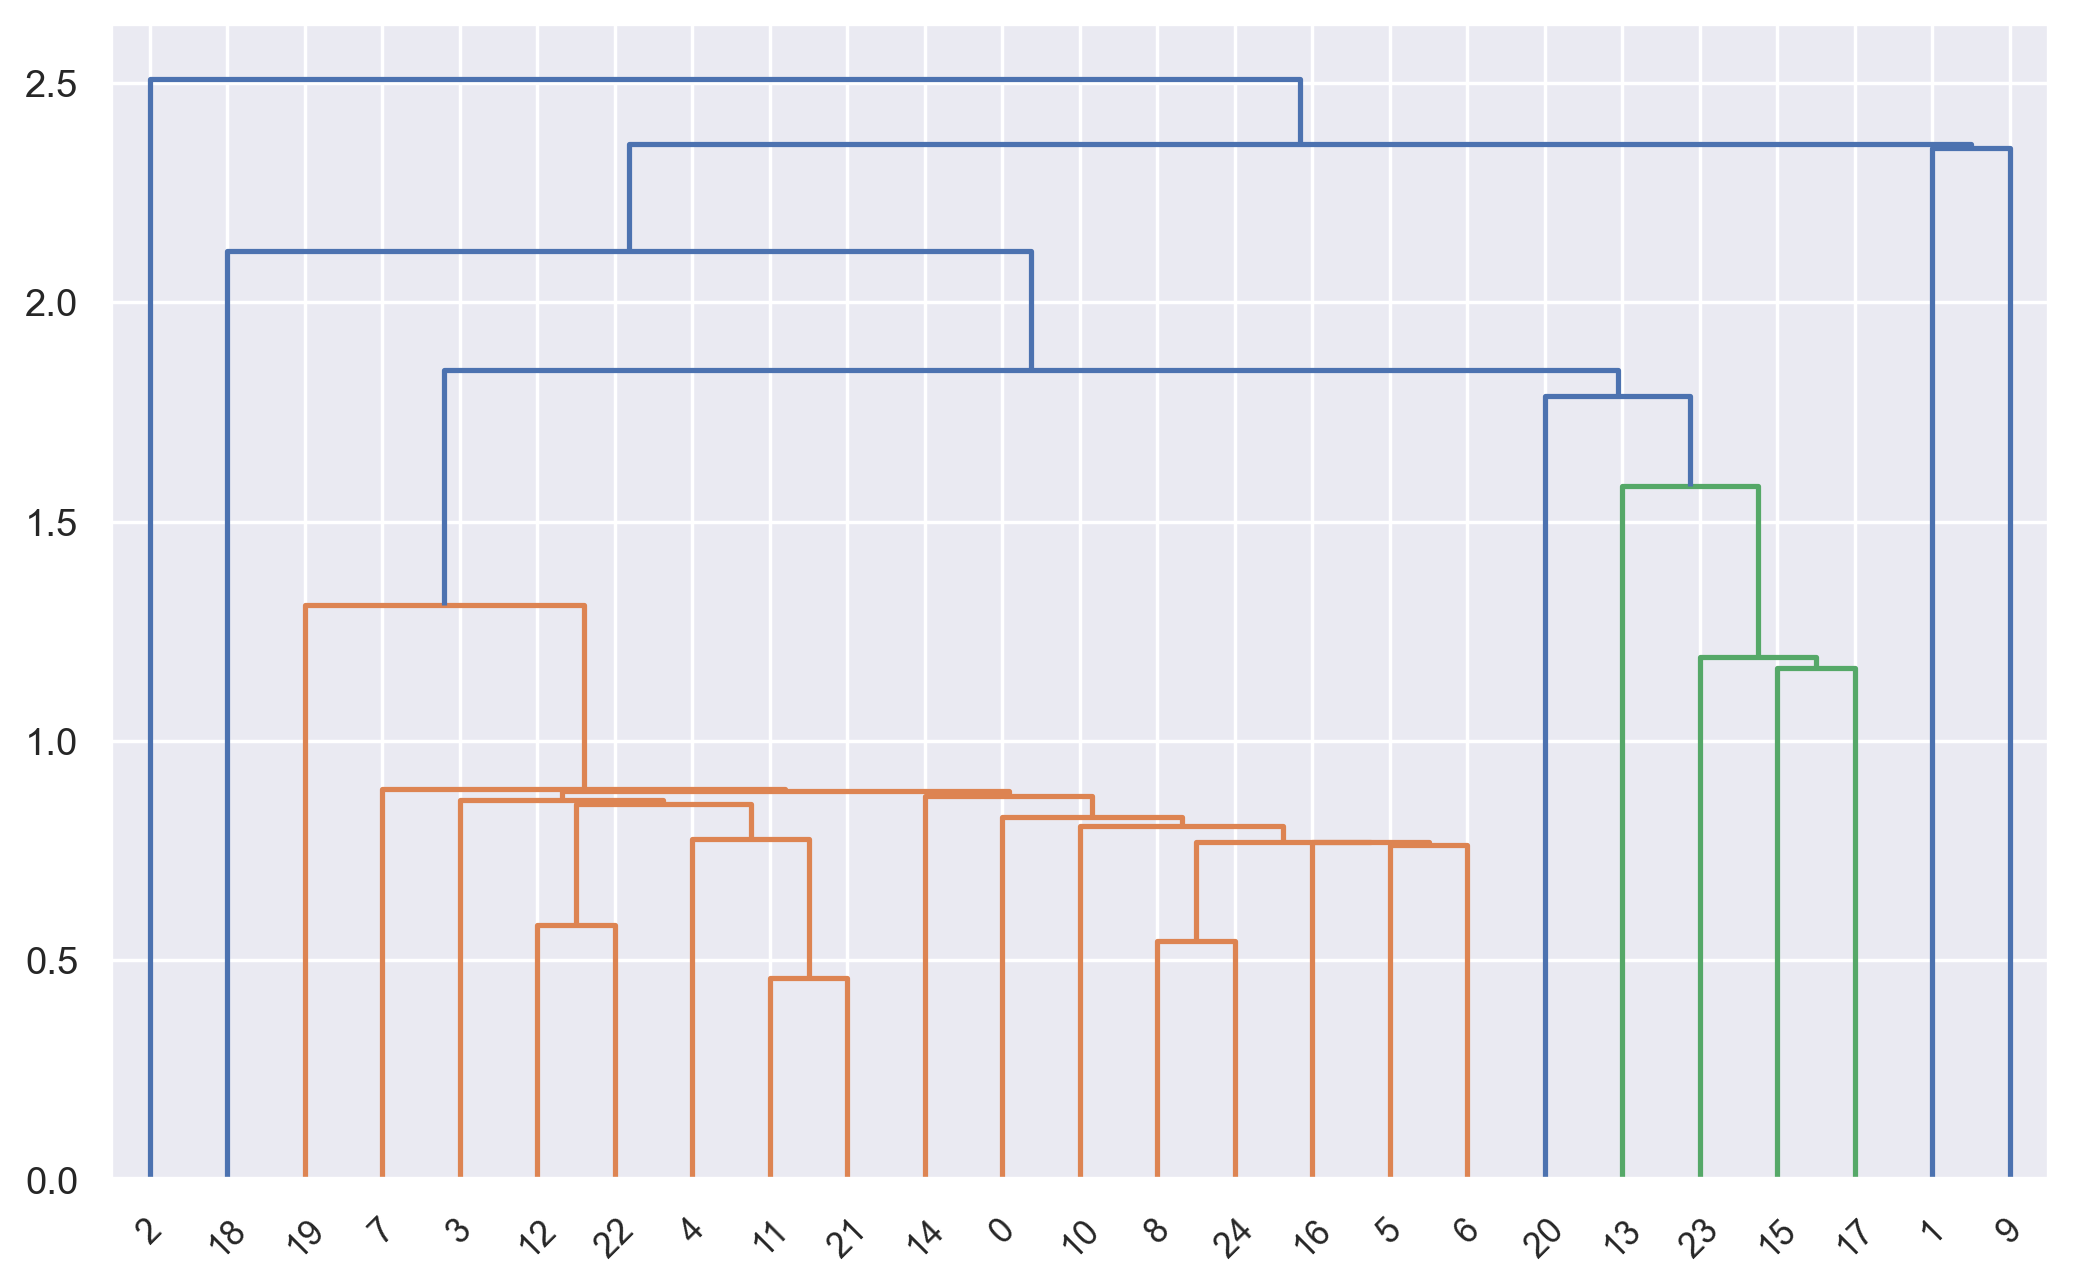

In [34]:
hi = hierarchy.linkage(x, method='single')
dendrogram = hierarchy.dendrogram(hi)

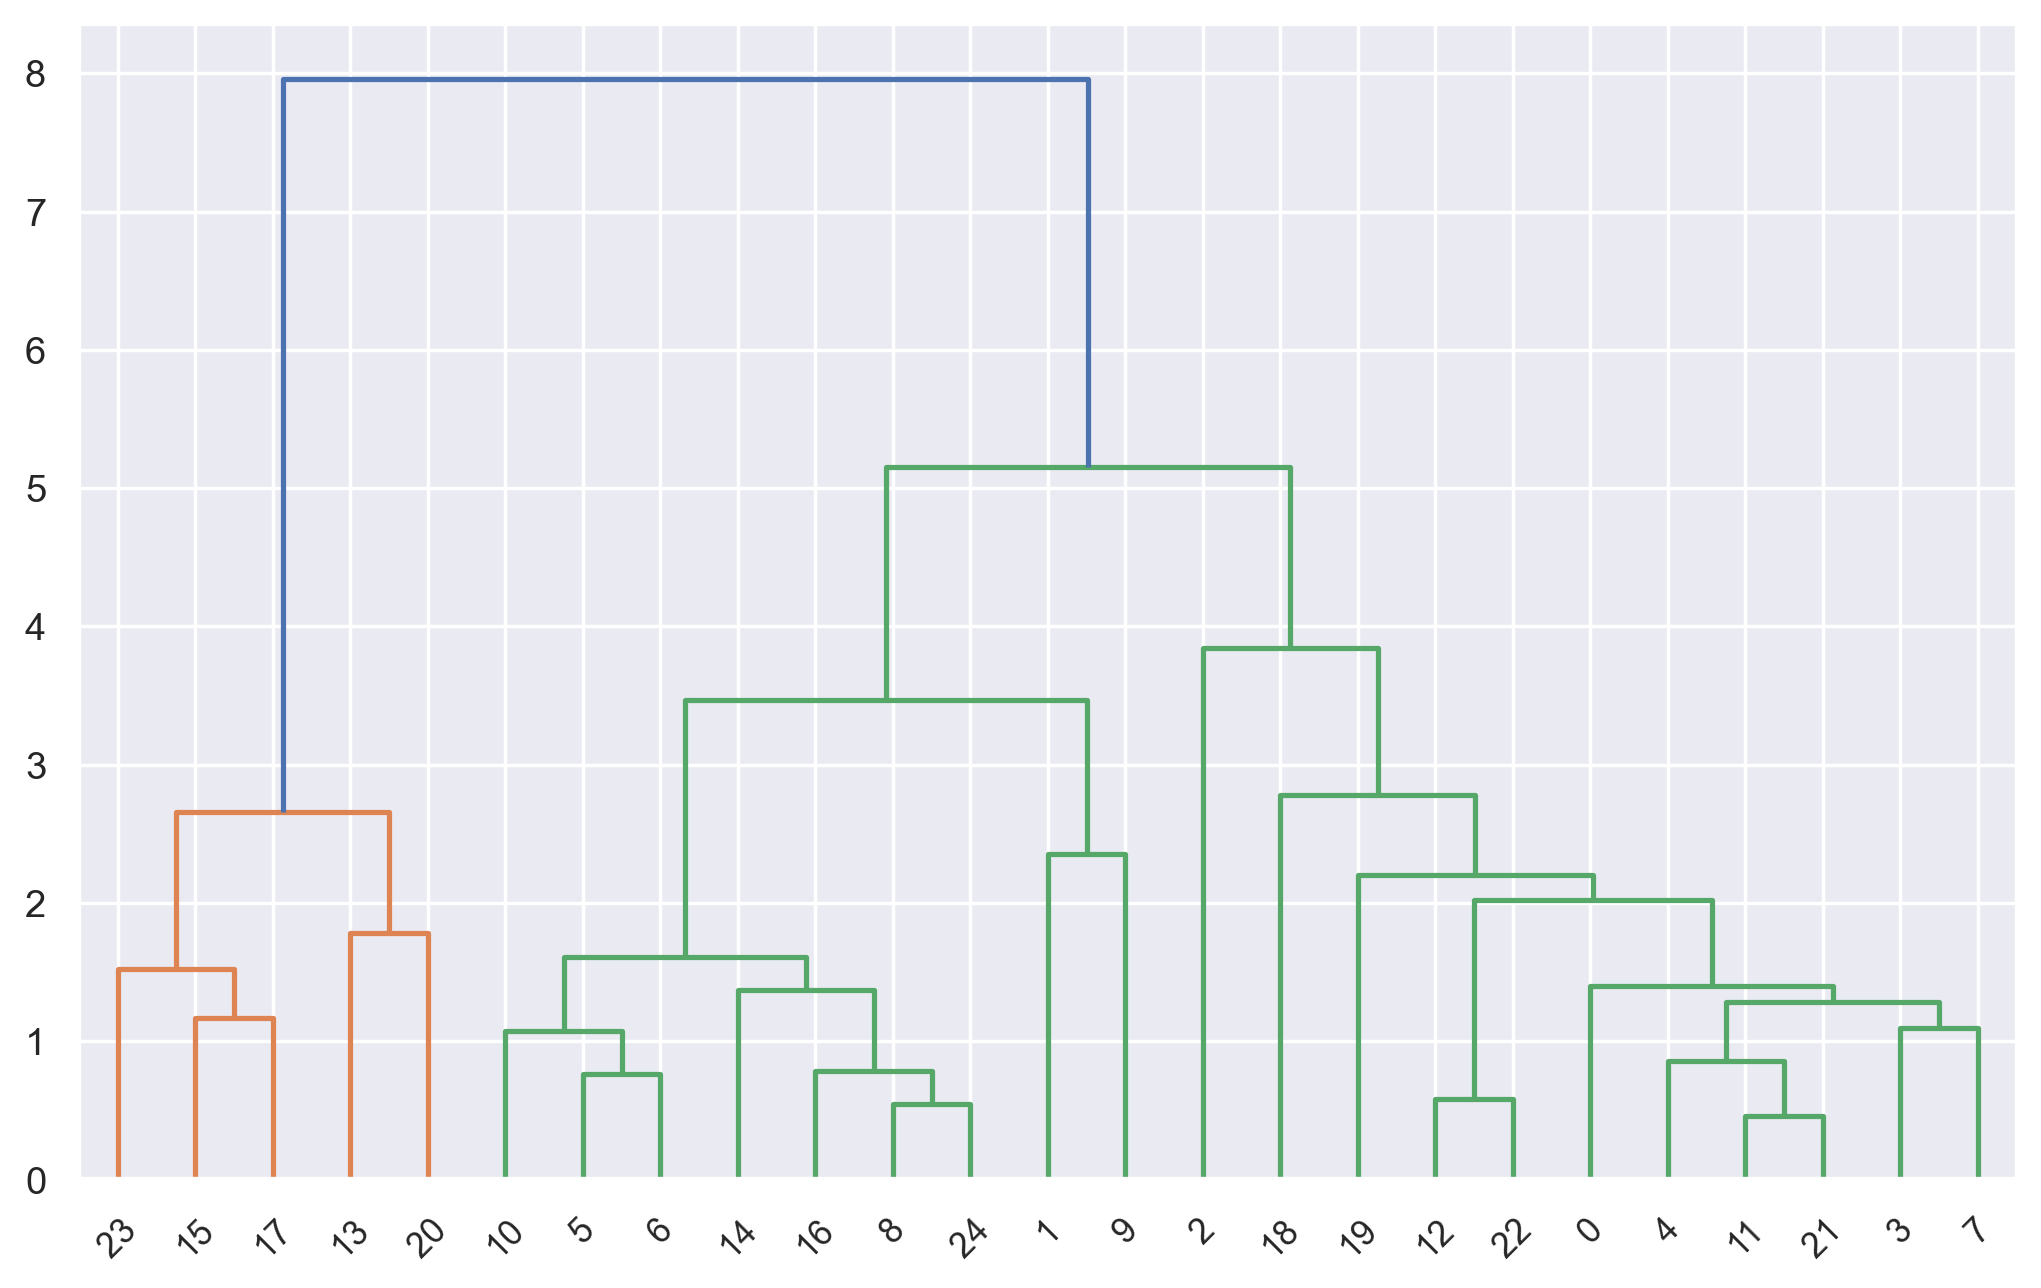

In [35]:
hi_com = hierarchy.linkage(x, method='complete')
dendrogram = hierarchy.dendrogram(hi_com)

# MODEL BUILDING

In [53]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2)
ypred = model.fit_predict(x)
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [54]:
df['cluster'] = ypred
df

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster,cluster1
0,1310.0,89.0,22.0,13.0,22704.0,94.0,0,2
1,1415.0,100.0,25.0,6.5,63575.0,81.0,0,0
2,1260.0,62.0,59.0,9.0,25026.0,72.0,0,2
3,1310.0,76.0,24.0,12.0,31510.0,88.0,0,2
4,1280.0,83.0,33.0,13.0,21864.0,90.0,0,2
5,1340.0,89.0,23.0,10.0,32162.0,95.0,0,0
6,1315.0,90.0,30.0,12.0,31585.0,95.0,0,0
7,1255.0,74.0,24.0,12.0,20126.0,92.0,0,2
8,1400.0,91.0,14.0,11.0,39525.0,97.0,0,0
9,1305.0,75.0,44.0,7.0,58691.0,87.0,0,0


<Axes: xlabel='Top10', ylabel='Expenses'>

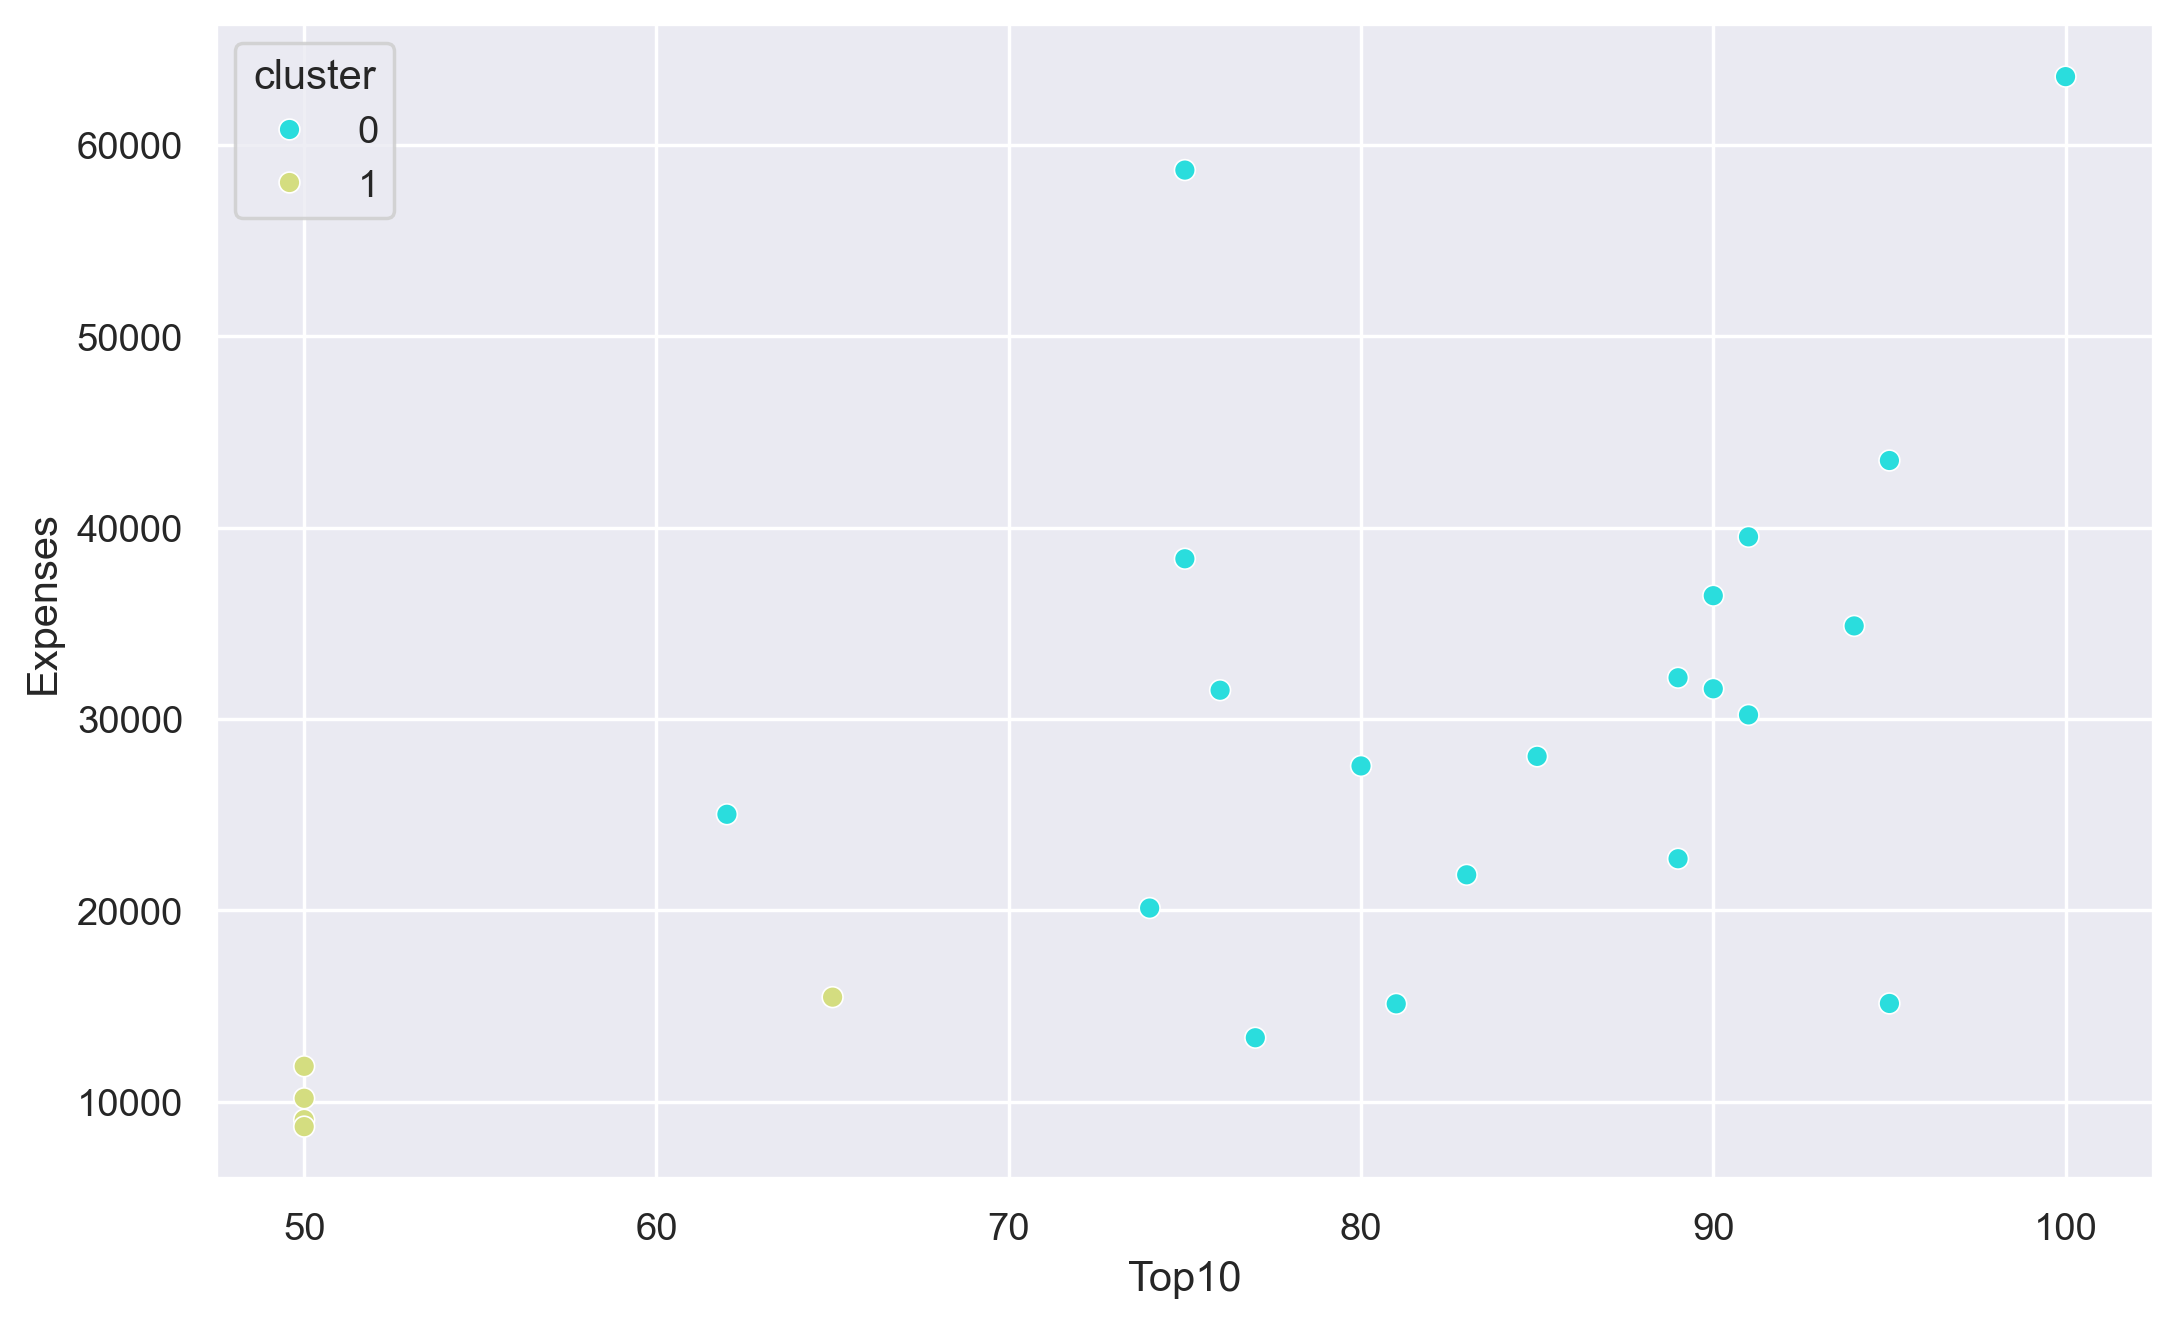

In [46]:
sns.scatterplot(x=df['Top10'], y=df['Expenses'], hue=df['cluster'], palette='rainbow')

# just to get and idear about clusters

In [55]:
silhouette_score(x, ypred)

0.5302082412444303

# model2

In [47]:
# building model with 3 clusters
model1 = AgglomerativeClustering(n_clusters=3)
ypred = model1.fit_predict(x)
ypred

array([2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 1, 2,
       2, 1, 0], dtype=int64)

In [ ]:
# getting prediction

In [48]:
df['cluster1'] =  ypred
df

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster,cluster1
0,1310.0,89.0,22.0,13.0,22704.0,94.0,0,2
1,1415.0,100.0,25.0,6.5,63575.0,81.0,0,0
2,1260.0,62.0,59.0,9.0,25026.0,72.0,0,2
3,1310.0,76.0,24.0,12.0,31510.0,88.0,0,2
4,1280.0,83.0,33.0,13.0,21864.0,90.0,0,2
5,1340.0,89.0,23.0,10.0,32162.0,95.0,0,0
6,1315.0,90.0,30.0,12.0,31585.0,95.0,0,0
7,1255.0,74.0,24.0,12.0,20126.0,92.0,0,2
8,1400.0,91.0,14.0,11.0,39525.0,97.0,0,0
9,1305.0,75.0,44.0,7.0,58691.0,87.0,0,0


<Axes: xlabel='Top10', ylabel='Expenses'>

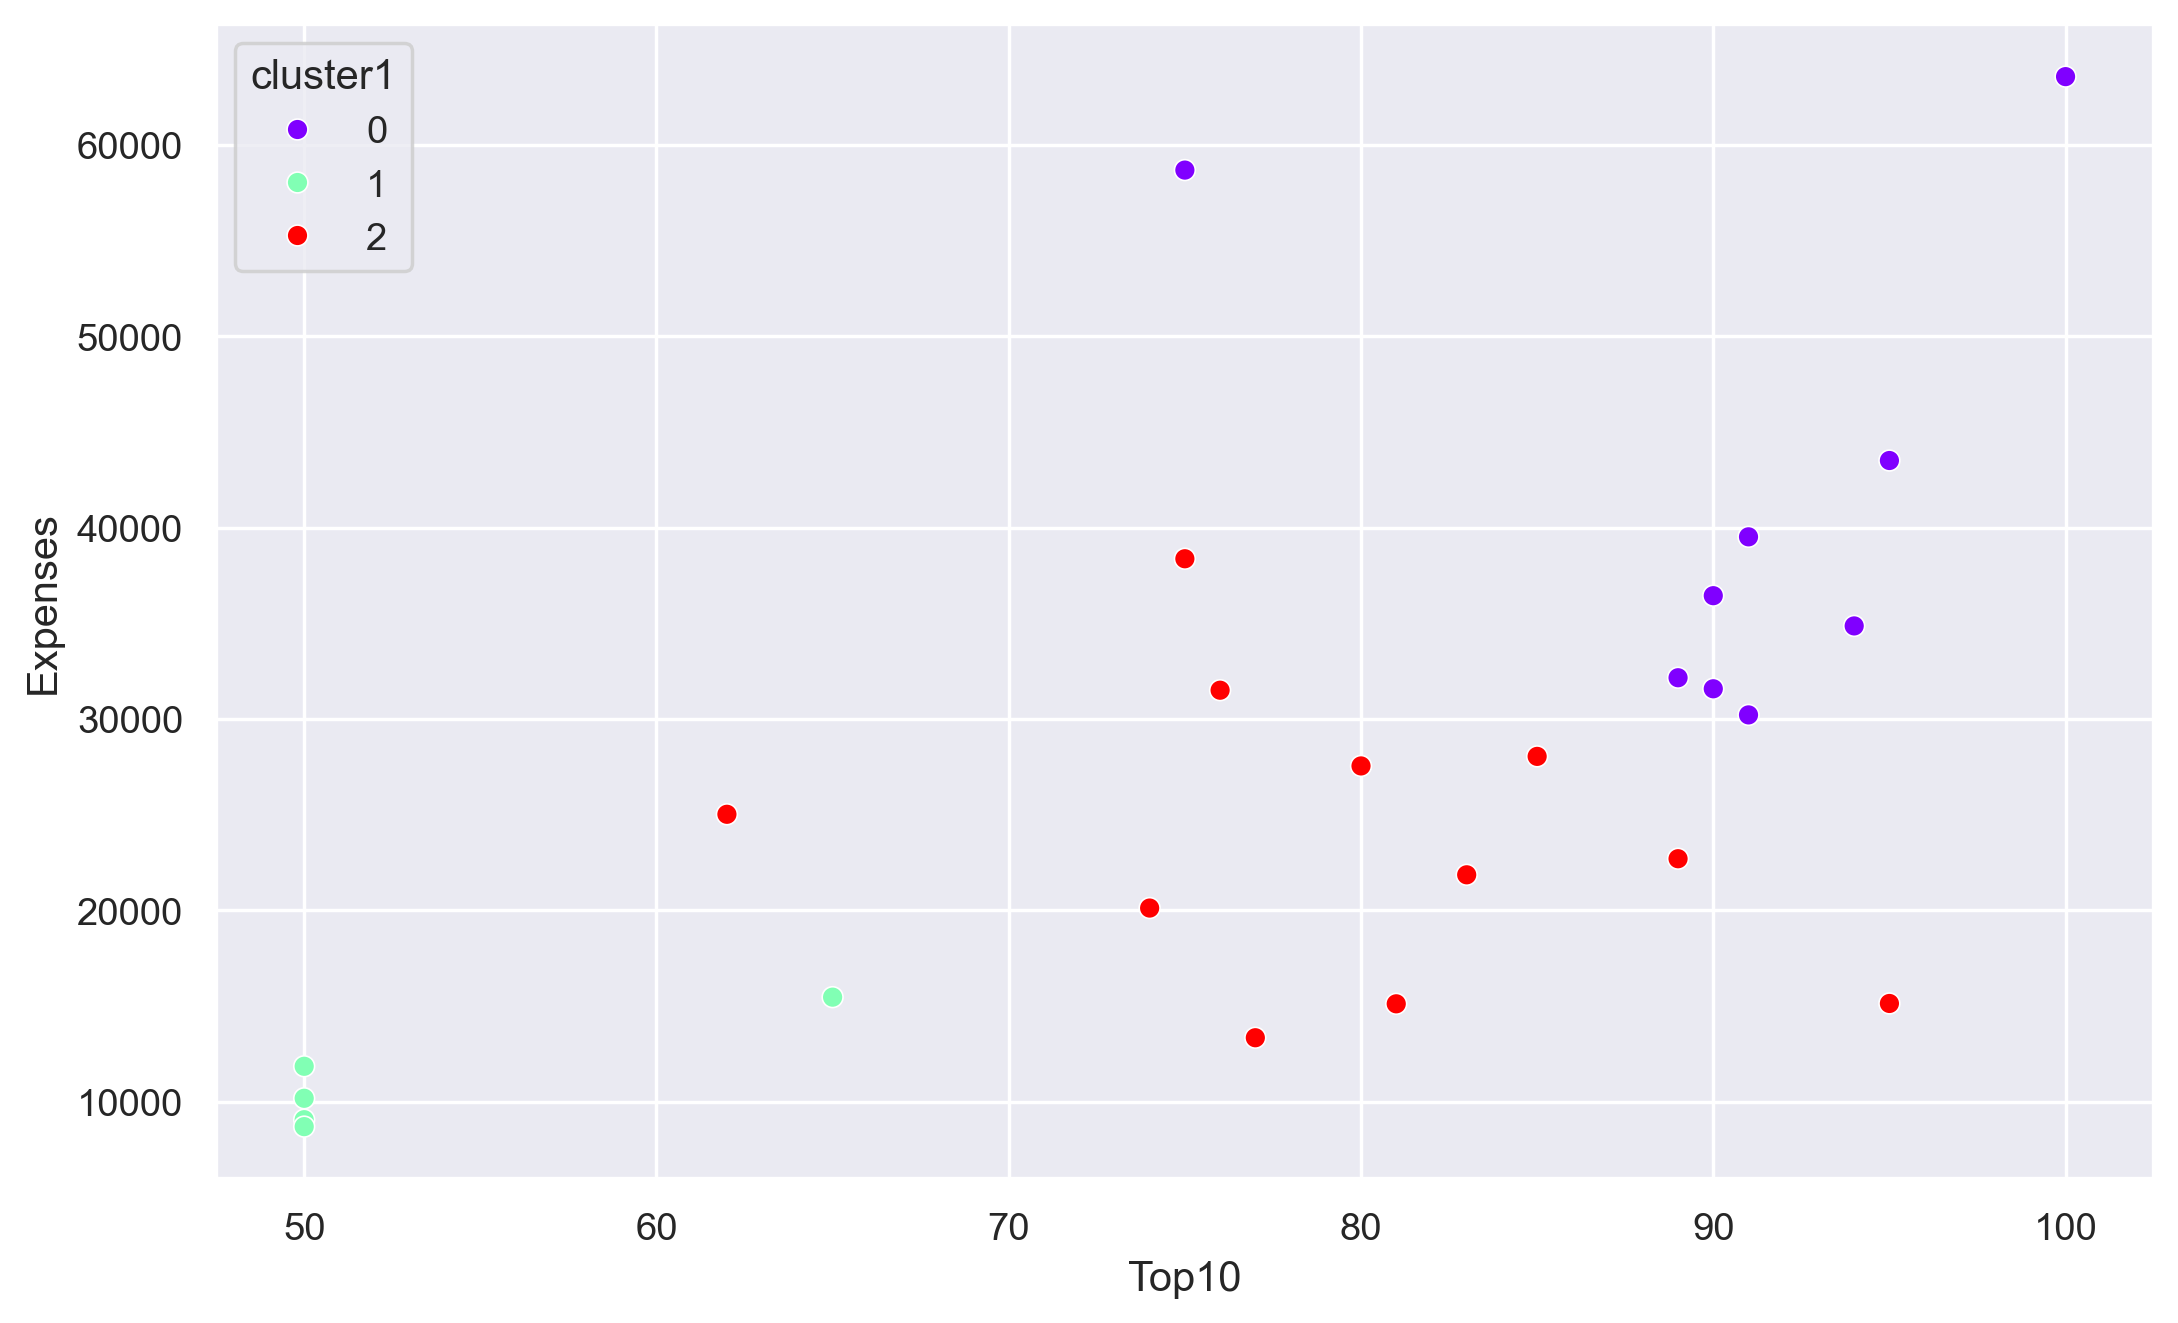

In [50]:
sns.scatterplot(x=df['Top10'], y=df['Expenses'], hue=df['cluster1'], palette='rainbow')

# just to get an idea of clusters , plot scatter plot

# check accuracy

In [52]:
from sklearn.metrics import silhouette_score
silhouette_score(x, ypred)

0.33987256532884047

# final model

In [57]:
# so final model will be : first model with 2 clusters

# analyse the clusters

In [58]:
df.groupby('cluster').agg('mean')           #why it has created these two clusters

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster1
cluster,,,,,,,
0,1311.75,84.6,31.6,11.275,31470.9,89.8,1.1
1,1108.00,53.0,69.4,17.200,11056.4,74.4,1.0


### cluster 0 : cluster is created due to the expesive univercities, where acceptance ratio is less and chances of getting in 10 is higher, GradRate is higher, SAT score of students is also higher 
### cluster 1 : cluster is created due to the cheap univercities. In comparision to the universities which are present in the 0 cluster these universities are performing low in almost every aspest